In [20]:
import matplotlib.pyplot as plt
from numpy import exp,log,arange,concatenate

%matplotlib inline

In [2]:
def decay_const(hl):
    return log(2)/hl

# Define the constants of the decay

In [3]:
A_parent_t0=1
hl_parent=65.9 #h
lambda_parent=decay_const(hl_parent)

hl_daughter = 6 #h
lambda_daughter = decay_const(hl_daughter)

bran_rat = 0.822 #define the branching ratio

In [4]:
t0=arange(0,200)

In [5]:
def act_parent(A_parent,lambda_parent,t):
    return A_parent*exp(-lambda_parent*t)

In [6]:
def act_daughter(A_parent,lambda_parent,lambda_daughter,branching_ratio,t1,t2):
    return A_parent*lambda_daughter*branching_ratio/(lambda_daughter-lambda_parent)*(exp(-lambda_parent*(t2-t1))-exp(-lambda_daughter*(t2-t1)))

In [8]:
Ap=act_parent(A_parent_t0,lambda_parent,t0)
Ad0=act_daughter(A_parent_t0,lambda_parent,lambda_daughter,bran_rat,0,t0)

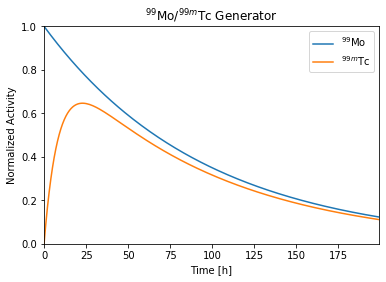

In [12]:
plt.plot(t0,Ap,t0,Ad0)
plt.legend(['$^{99}$Mo','$^{99m}$Tc'])
plt.legend(['$^{99}$Mo','$^{99m}$Tc'])
plt.title('$^{99}$Mo/$^{99m}$Tc Generator')
plt.ylabel('Normalized Activity')
plt.xlabel('Time [h]')
plt.ylim(0,1)
plt.xlim(0,t0.max())

In [104]:
milk_times = [24,48,72,98,120,200]
# milk_times = [12,24,30,200]
t_tot = []
A_tot = []

for ind,el in enumerate(milk_times):
    if ind == 0:
        t = arange(0,el)
        Ad = act_daughter(act_parent(A_parent_t0,lambda_parent,0),lambda_parent,lambda_daughter,bran_rat,0,t)
    else:        
        t = arange(milk_times[ind-1],el)
        Ad = act_daughter(act_parent(A_parent_t0,lambda_parent,milk_times[ind-1]),lambda_parent,lambda_daughter,bran_rat,milk_times[ind-1],t)
        
    t_tot = concatenate((t_tot,t))
    A_tot = concatenate((A_tot,Ad))


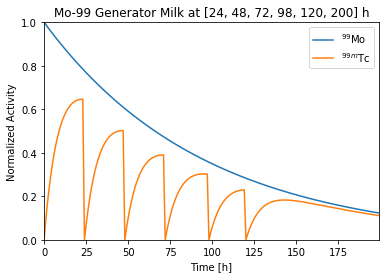

In [106]:
plt.plot(t0,Ap,t_tot,A_tot)
plt.legend(['$^{99}$Mo','$^{99m}$Tc'])
plt.title(f"Mo-99 Generator Milk at {milk_times} h")
plt.ylabel('Normalized Activity')
plt.xlabel('Time [h]')
plt.ylim(0,1)
plt.xlim(0,t0.max())